# **EDA for the Titanic dataset by Python's core DS libraries:**

In [2]:
#%% Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#%% Load Dataset
df = sns.load_dataset('titanic')
print("✅ Dataset loaded successfully")


✅ Dataset loaded successfully


# 1. Initial Data Exploration

In [4]:
#%% Data Overview
print("📊 Dataset Shape:", df.shape)
print("\n🔍 First 5 Rows:")
display(df.head())

print("\n📋 Dataset Info:")
df.info()

print("\n📈 Summary Statistics:")
display(df.describe(include='all'))

print("\n🎯 Missing Values:")
missing = df.isnull().sum()
print(missing[missing > 0])


📊 Dataset Shape: (891, 15)

🔍 First 5 Rows:


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True



📋 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB

📈 Summary Statistics:


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
count,891.000000,891.000000,891,714.000000,891.000000,891.000000,891.000000,889,891,891,891,203,889,891,891
unique,NaN,NaN,2,NaN,NaN,NaN,NaN,3,3,3,2,7,3,2,2
top,NaN,NaN,male,NaN,NaN,NaN,NaN,S,Third,man,True,C,Southampton,no,True
freq,NaN,NaN,577,NaN,NaN,NaN,NaN,644,491,537,537,59,644,549,537
mean,0.383838,2.308642,NaN,29.699118,0.523008,0.381594,32.204208,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,0.486592,0.836071,NaN,14.526497,1.102743,0.806057,49.693429,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,1.000000,NaN,0.420000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,0.000000,2.000000,NaN,20.125000,0.000000,0.000000,7.910400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,0.000000,3.000000,NaN,28.000000,0.000000,0.000000,14.454200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,1.000000,3.000000,NaN,38.000000,1.000000,0.000000,31.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN



🎯 Missing Values:
age            177
embarked         2
deck           688
embark_town      2
dtype: int64


# 2. Data Cleaning

In [ ]:
#%% Handle Missing Values
df['age'] = df['age'].fillna(df['age'].median())
df['embarked'] = df['embarked'].fillna(df['embarked'].mode()[0])
df['embark_town'] = df['embark_town'].fillna(df['embark_town'].mode()[0])
df = df.drop(columns=['deck'])  # Too many missing values

print("\n✅ Missing Values After Cleaning:")
print(df.isnull().sum()[df.isnull().sum() > 0])



✅ Missing Values After Cleaning:
Series([], dtype: int64)


In [9]:
import warnings
warnings.filterwarnings('ignore')

---
# 3. Univariate Analysis

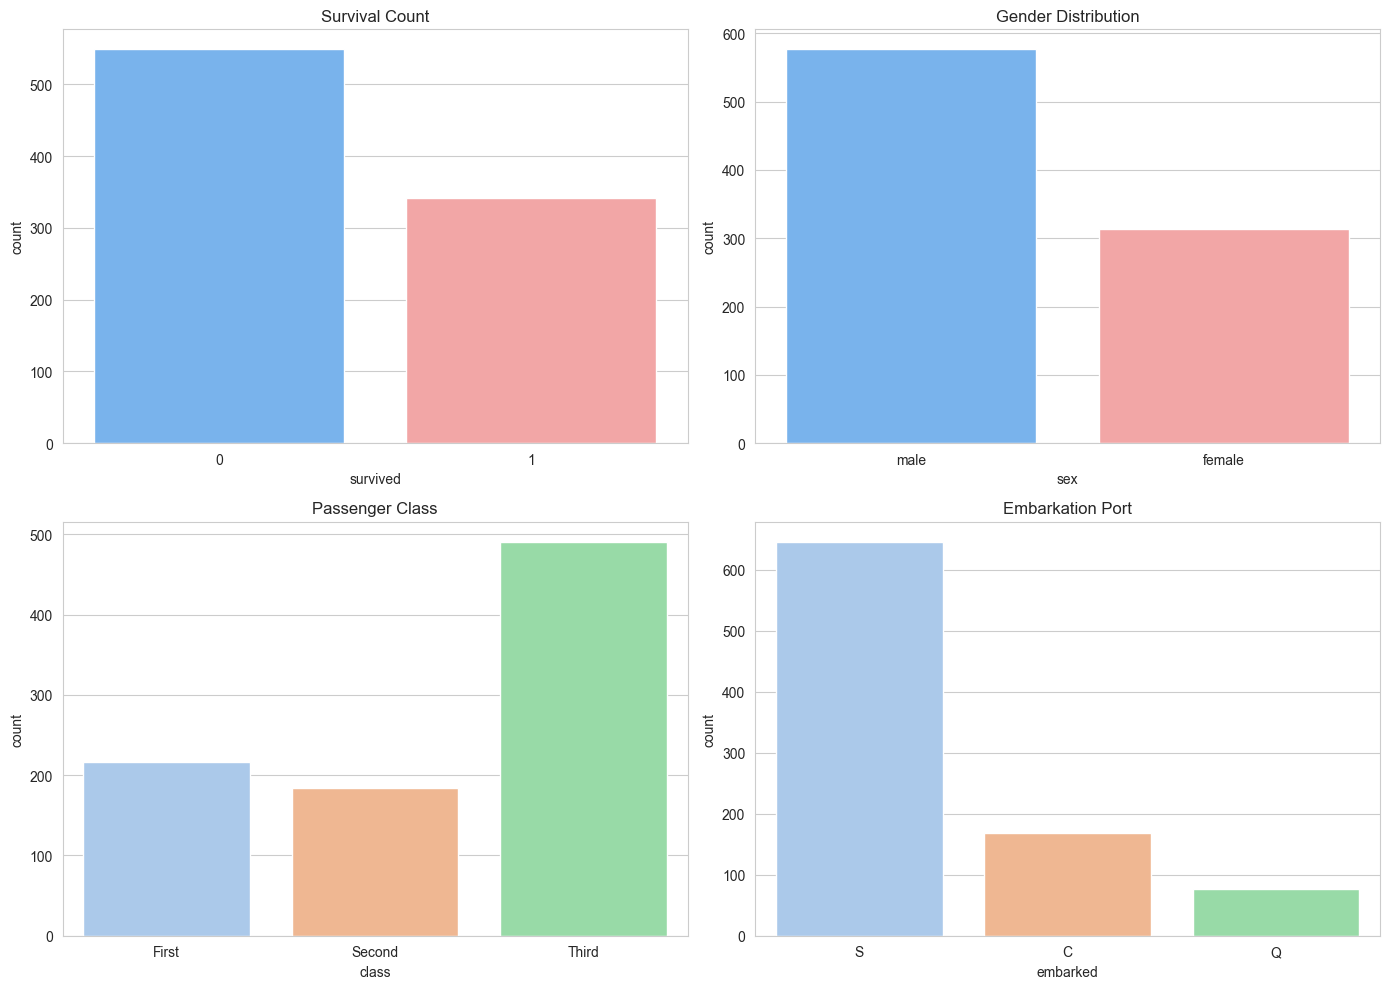

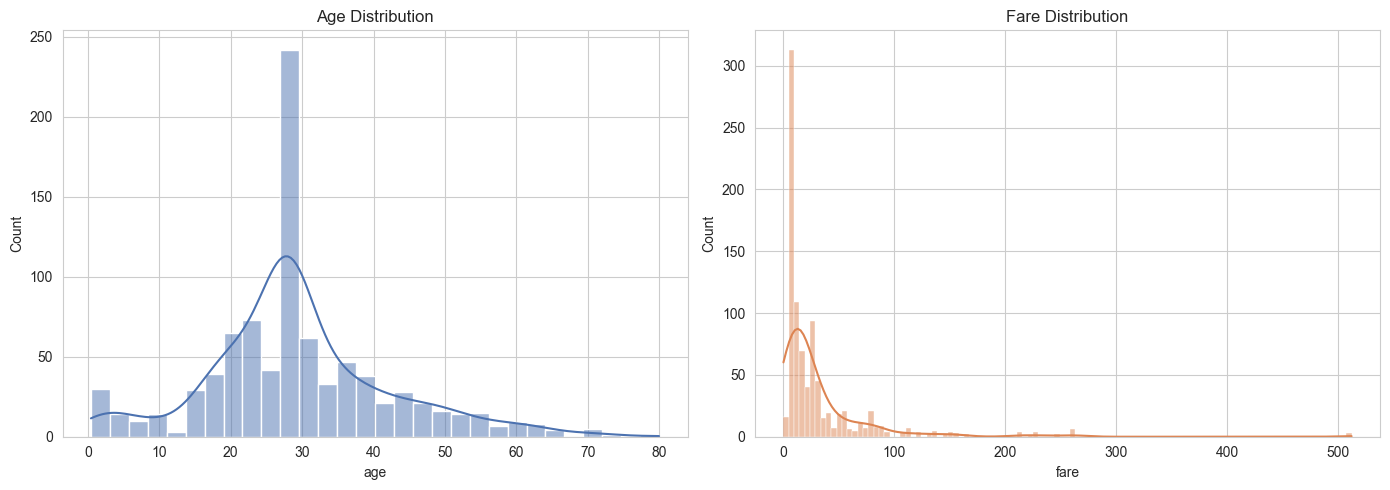

In [10]:
#%% Set Visual Style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)
colors = ["#66b3ff", "#ff9999"]

#%% Categorical Features
fig, ax = plt.subplots(2, 2, figsize=(14, 10))
sns.countplot(x='survived', data=df, ax=ax[0,0], palette=colors).set_title('Survival Count')
sns.countplot(x='sex', data=df, ax=ax[0,1], palette=colors).set_title('Gender Distribution')
sns.countplot(x='class', data=df, ax=ax[1,0], palette='pastel').set_title('Passenger Class')
sns.countplot(x='embarked', data=df, ax=ax[1,1], palette='pastel').set_title('Embarkation Port')
plt.tight_layout()
plt.show()

#%% Numerical Features
fig, ax = plt.subplots(1, 2, figsize=(14, 5))
sns.histplot(df['age'], kde=True, ax=ax[0], color='#4c72b0').set_title('Age Distribution')
sns.histplot(df['fare'], kde=True, ax=ax[1], color='#dd8452').set_title('Fare Distribution')
plt.tight_layout()
plt.show()


---
# 4. Bivariate Analysis

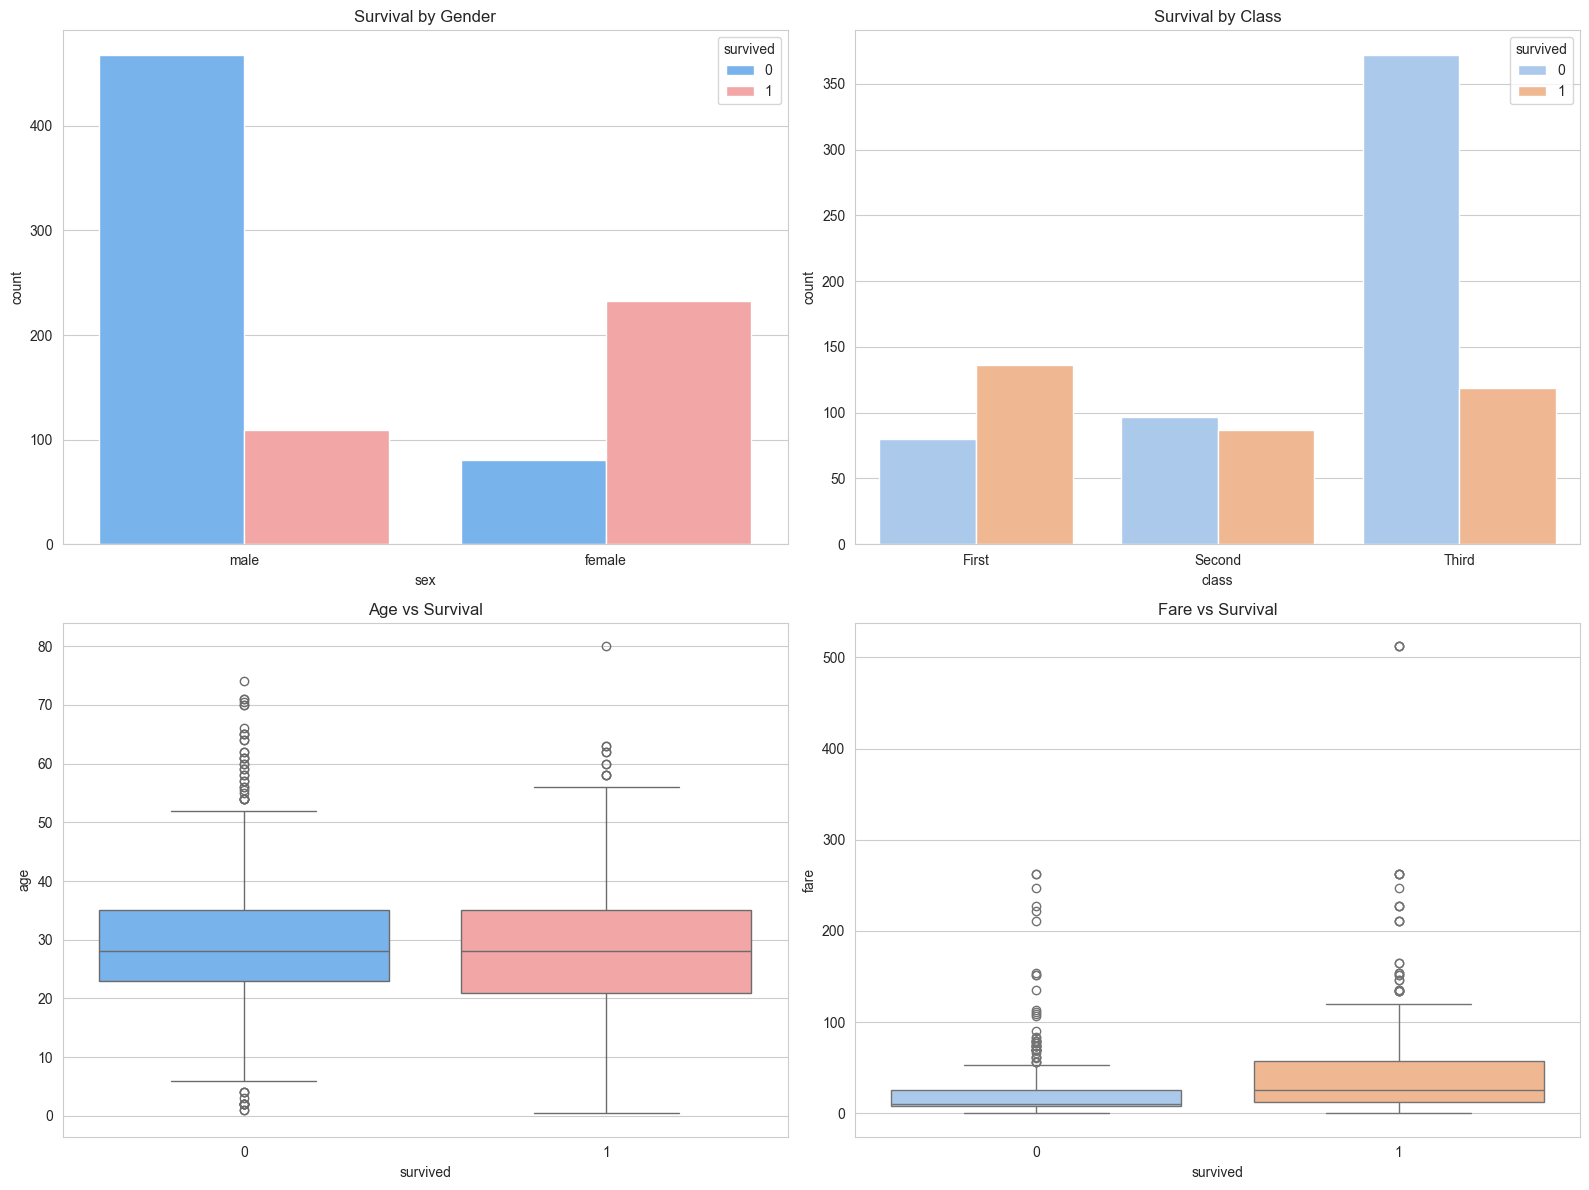

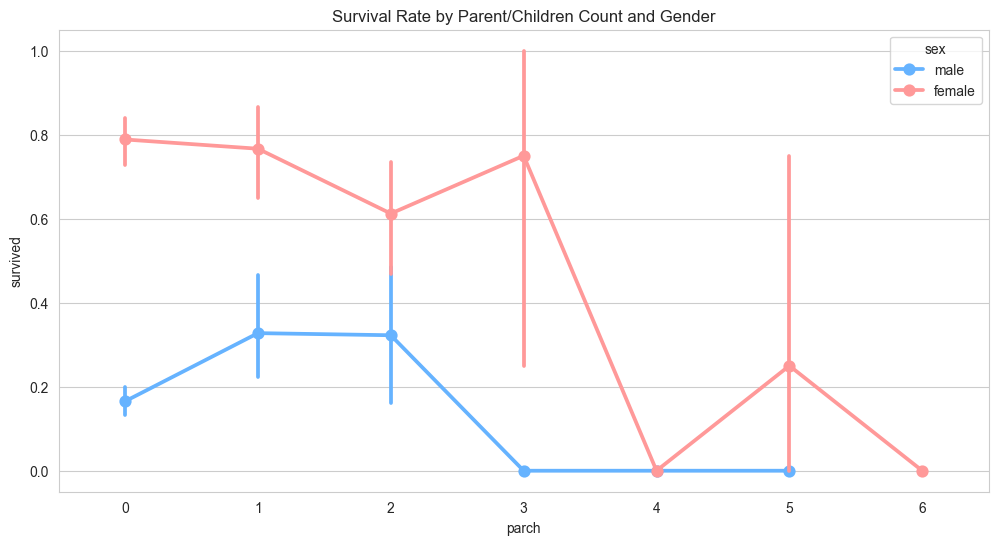

In [11]:
#%% Survival Relationships
fig, ax = plt.subplots(2, 2, figsize=(16, 12))
sns.countplot(x='sex', hue='survived', data=df, ax=ax[0,0], palette=colors).set_title('Survival by Gender')
sns.countplot(x='class', hue='survived', data=df, ax=ax[0,1], palette='pastel').set_title('Survival by Class')
sns.boxplot(x='survived', y='age', data=df, ax=ax[1,0], palette=colors).set_title('Age vs Survival')
sns.boxplot(x='survived', y='fare', data=df, ax=ax[1,1], palette='pastel').set_title('Fare vs Survival')
plt.tight_layout()
plt.show()

#%% Advanced Relationships
plt.figure(figsize=(12, 6))
sns.pointplot(x='parch', y='survived', hue='sex', data=df, palette=colors)
plt.title('Survival Rate by Parent/Children Count and Gender')
plt.show()


---
# 5. Correlation Analysis

In [ ]:
#%% Prepare Data for Correlation
df_encoded = df.copy()
gender_map = {'male': 0, 'female': 1}
class_map = {'First': 1, 'Second': 2, 'Third': 3}
embarked_map = {'C': 0, 'Q': 1, 'S': 2}

df_encoded['sex'] = df_encoded['sex'].map(gender_map)
df_encoded['class'] = df_encoded['class'].map(class_map)
df_encoded['embarked'] = df_encoded['embarked'].map(embarked_map)

#%% Correlation Matrix
plt.figure(figsize=(12, 8))
sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Feature Correlation Matrix')
plt.show()


---
# 6. Advanced Insights

In [ ]:
#%% Family Analysis
df['family_size'] = df['sibsp'] + df['parch']
plt.figure(figsize=(10, 6))
sns.countplot(x='family_size', hue='survived', data=df, palette='pastel')
plt.title('Survival by Family Size')
plt.show()

#%% Age Groups Analysis
df['age_group'] = pd.cut(df['age'], 
                         bins=[0, 12, 18, 30, 50, 100], 
                         labels=['Child', 'Teen', 'Young', 'Adult', 'Senior'])
plt.figure(figsize=(10, 6))
sns.countplot(x='age_group', hue='survived', data=df, palette='pastel')
plt.title('Survival by Age Groups')
plt.show()


---
# **Observations:**

- *Survival Bias*: Females had significantly higher survival rates (74% vs 19% males)

- *Class Impact*: 1st class passengers had 63% survival vs 24% in 3rd class

- *Age Factor*: Children (<12) had highest survival rate (59%)

- *Fare Correlation*: Survivors paid median fare £26 vs £13 for non-survivors

- *Family Size*: Passengers with 1-3 family members had better survival chances

---
# **7.Handle Outliers :** 
- To find and remove outliers in the age and fare columns of the Titanic dataset, a common and effective method is to use the Interquartile Range (IQR) technique. 
- Below is a clean, step-by-step Python code snippet using pandas and numpy that:

## *Detects outliers in age and fare using IQR*

- Shows how to remove those outliers from the dataframe

In [12]:
# Function to detect outliers using IQR for a given column
def find_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Return boolean mask where True indicates outliers
    return (data[column] < lower_bound) | (data[column] > upper_bound)

# Detect outliers for 'age' and 'fare'
outliers_age = find_outliers_iqr(df, 'age')
outliers_fare = find_outliers_iqr(df, 'fare')

print(f"Number of outliers in 'age': {outliers_age.sum()}")
print(f"Number of outliers in 'fare': {outliers_fare.sum()}")

# Optionally, inspect some outlier values
print("\nSample outlier ages:")
print(df.loc[outliers_age, 'age'].sort_values().head())

print("\nSample outlier fares:")
print(df.loc[outliers_fare, 'fare'].sort_values(ascending=False).head())

# Remove outliers from dataframe (rows where age or fare are outliers)
df_no_outliers = df[~(outliers_age | outliers_fare)].copy()

print(f"\nShape before removing outliers: {df.shape}")
print(f"Shape after removing outliers: {df_no_outliers.shape}")


Number of outliers in 'age': 66
Number of outliers in 'fare': 116

Sample outlier ages:
803    0.42
755    0.67
644    0.75
469    0.75
78     0.83
Name: age, dtype: float64

Sample outlier fares:
258    512.3292
737    512.3292
679    512.3292
27     263.0000
341    263.0000
Name: fare, dtype: float64

Shape before removing outliers: (891, 14)
Shape after removing outliers: (721, 14)


# Observations: 
- We calculate Q1 (25th percentile) and Q3 (75th percentile) for each column.
- IQR = Q3 - Q1.
- Outliers are values below Q1−1.5×IQR or above Q3+1.5×IQR.warnings
- We create boolean masks to identify these outliers.
- inally, we filter the dataframe to exclude any rows where age or fare are outliers.

---
# **8.Scale Data:** 
- To scale data in your DataFrame (df), you have several standard techniques available. 
- Here are the most common methods and their code examples using only pandas and numpy:
## **1. Min-Max Scaling (Normalization)**
- Scales values to a [0,range.


In [14]:
# Min-Max Scaling for 'age' and 'fare'
df['age_scaled'] = (df['age'] - df['age'].min()) / (df['age'].max() - df['age'].min())
df['fare_scaled'] = (df['fare'] - df['fare'].min()) / (df['fare'].max() - df['fare'].min())

- This keeps the original distribution shape but rescales the range
## **2. Standardization (Z-score Scaling)**
- Centers data to mean 0 and standard deviation 1.

In [15]:
# Standardization for 'age' and 'fare'
df['age_standardized'] = (df['age'] - df['age'].mean()) / df['age'].std()
df['fare_standardized'] = (df['fare'] - df['fare'].mean()) / df['fare'].std()

- This is useful for algorithms that assume normally distributed data.

## **3. Robust Scaling**
- Uses median and IQR, making it robust to outliers.

In [16]:
# Robust Scaling for 'age' and 'fare'
age_median = df['age'].median()
age_iqr = df['age'].quantile(0.75) - df['age'].quantile(0.25)
df['age_robust'] = (df['age'] - age_median) / age_iqr

fare_median = df['fare'].median()
fare_iqr = df['fare'].quantile(0.75) - df['fare'].quantile(0.25)
df['fare_robust'] = (df['fare'] - fare_median) / fare_iqr

- This method is best when your data contains outliers
# **Data Scaling Methods Summary**

| Method          | Code Example                      | When to Use                |
|-----------------|---------------------------------|----------------------------|
| Min-Max Scaling | `(x - min) / (max - min)`        | Features with known bounds |
| Standardization | `(x - mean) / std`                | Normal distribution needed |
| Robust Scaling  | `(x - median) / (Q3 - Q1)`       | Data with outliers         |


survived             0
pclass               0
sex                  0
age                  0
sibsp                0
parch                0
fare                 0
embarked             0
class                0
who                  0
adult_male           0
embark_town          0
alive                0
alone                0
age_scaled           0
fare_scaled          0
age_standardized     0
fare_standardized    0
age_robust           0
fare_robust          0
dtype: int64